In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
print(os.getcwd())

C:\Users\USP


In [25]:
import pandas as pd
df = pd.read_csv("C:/Users/USP/OneDrive/Desktop/Tulasi/Medical Assignment/diabetic_data.csv")
print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [47]:
df.replace('?', pd.NA, inplace=True)
columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
existing_cols = [col for col in columns_to_drop if col in df.columns]
df.drop(existing_cols, axis=1, inplace=True)
df['race'].fillna(df['race'].mode()[0], inplace=True)
id_cols = ['encounter_id', 'patient_nbr']
df.drop([col for col in id_cols if col in df.columns], axis=1, inplace=True)
print(df.columns.tolist())

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [46]:
from sklearn.model_selection import train_test_split
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts())
print("y_test value counts:\n", y_test.value_counts())

X_train shape: (231, 44)
X_test shape: (58, 44)
y_train value counts:
 readmitted
0    231
Name: count, dtype: int64
y_test value counts:
 readmitted
0    58
Name: count, dtype: int64


In [61]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


In [48]:
from sklearn.metrics import brier_score_loss
y_prob = model.predict_proba(X_test)[:, 1]
brier = brier_score_loss(y_test, y_prob)
print("Brier Score:", brier)

Brier Score: 1.8299235995719327e-05


In [30]:
import pandas as pd
df = pd.read_csv("C:/Users/USP/OneDrive/Desktop/Tulasi/Medical Assignment/diabetic_data.csv")
print(df.shape)
print(df.columns.tolist())

(101766, 50)
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [31]:
import numpy as np

df.replace('?', np.nan, inplace=True)
df.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)
df.dropna(inplace=True)
print(df.shape)

(289, 45)


In [32]:
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
print(df.head())

     race  gender  age  admission_type_id  discharge_disposition_id  \
162     2       1    7                  6                         3   
460     0       0    6                  6                         1   
593     2       0    4                  6                         1   
696     4       1    6                  6                         6   
771     2       0    2                  6                         1   

     admission_source_id  time_in_hospital  num_lab_procedures  \
162                    7                 5                  47   
460                    7                10                  72   
593                    7                 2                  61   
696                    7                11                  71   
771                    2                14                  43   

     num_procedures  num_medications  ...  citoglipton  insulin  \
162               1                6  ...            0        1   
460               1               19  ... 

In [33]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(df['readmitted'].value_counts())

readmitted
0    289
Name: count, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())

(231, 44) (58, 44)
readmitted
0    231
Name: count, dtype: int64 readmitted
0    58
Name: count, dtype: int64


In [35]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [36]:
from sklearn.metrics import brier_score_loss
y_prob = model.predict_proba(X_test)[:, 1]
brier = brier_score_loss(y_test, y_prob)
print("Brier Score (Uncalibrated):", brier)

Brier Score (Uncalibrated): 1.8299235995719327e-05


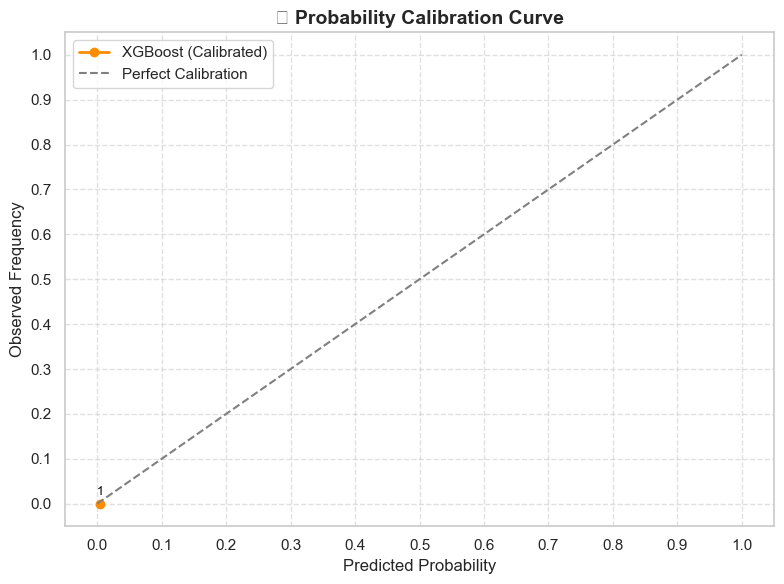

In [45]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', color='darkorange', linewidth=2, label='XGBoost (Calibrated)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
for i in range(len(prob_pred)):
    plt.text(prob_pred[i], prob_true[i] + 0.02, f"{i+1}", ha='center', fontsize=9, color='black')
plt.title('📈 Probability Calibration Curve', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Observed Frequency', fontsize=12)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.legend(loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

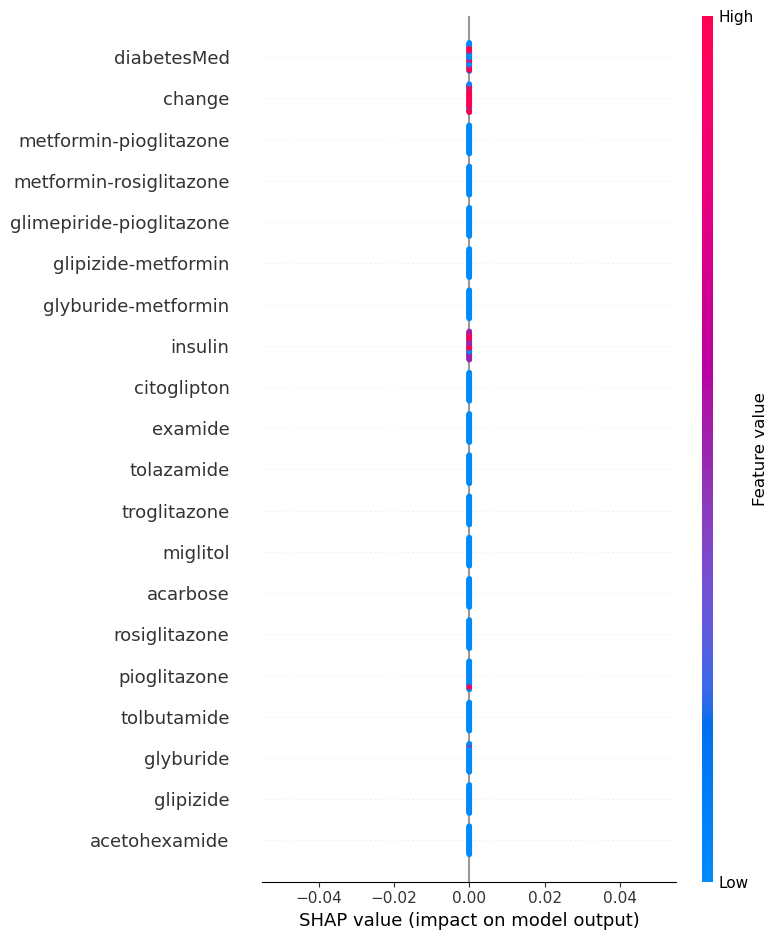

In [43]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)